In [75]:

import numpy as np
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [76]:
full_data = pd.read_csv('titanic_data.csv')
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
y = full_data['Survived']
x= full_data.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis = 1)
display(x.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [106]:
x = pd.get_dummies(x)

In [107]:
x = x.fillna(0.0)
display(x.head())

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_0.0,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,False,True


In [112]:
print(x['SibSp'].unique())

[1 0 3 4 2 5 8]


In [113]:
print(x['Parch'].unique())

[0 1 2 5 3 4 6]


In [114]:
print(x['Age'].unique())

[22.   38.   26.   35.    0.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [115]:
print(x['Pclass'].unique())

[3 1 2]


Text(0.5, 0, 'number of passengers who survived and not survived with respect they are all females')

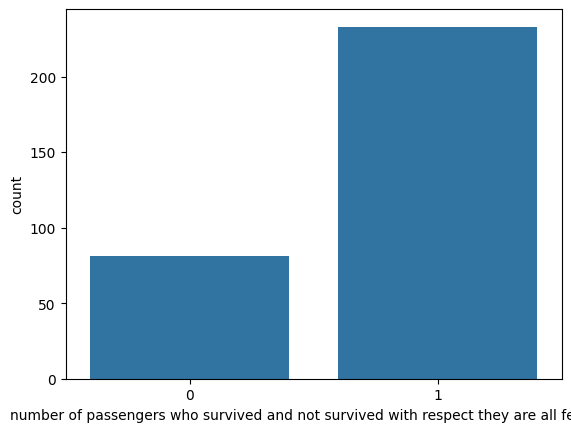

In [109]:
female_data=full_data[full_data["Sex"] == "female"]
sns.countplot(data=female_data,x='Survived')
plt.xlabel("number of passengers who survived and not survived with respect they are all females")

Text(0.5, 0, 'number of passengers who survived and not survived with respect they are all males')

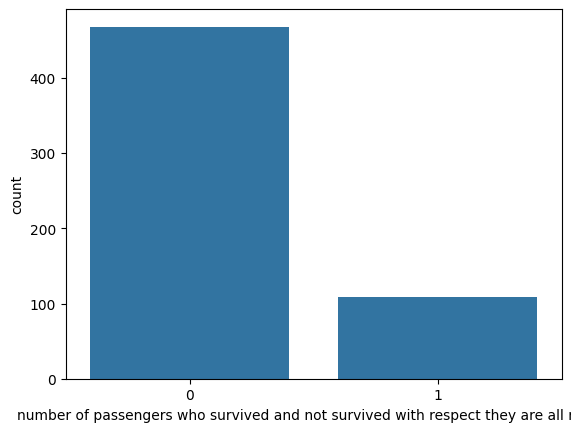

In [81]:
male_data=full_data[full_data["Sex"] == "male"]
sns.countplot(data=male_data,x='Survived')
plt.xlabel("number of passengers who survived and not survived with respect they are all males")

Text(0.5, 0, 'all females')

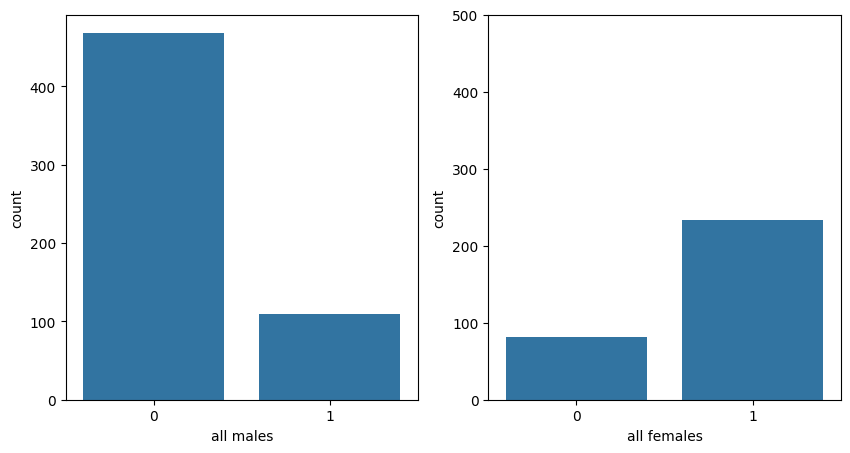

In [82]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1) 
sns.countplot(data=male_data,x='Survived')
plt.xlabel("all males")
plt.subplot(1, 2, 2)
sns.countplot(data=female_data,x='Survived')
ylabel=np.arange(0,600,100)
plt.yticks(ylabel)
plt.xlabel("all females")

In [83]:
def predictions_1(data):
    
    predictions = []
    for i,passenger in data.iterrows():
        if passenger['Sex']=='female':
            predictions.append(1)
        else:
            predictions.append(0) 
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(x)

In [84]:
print(accuracy_score(y, predictions))

0.7867564534231201


Text(0.5, 0, 'males survival rate with respect to age ')

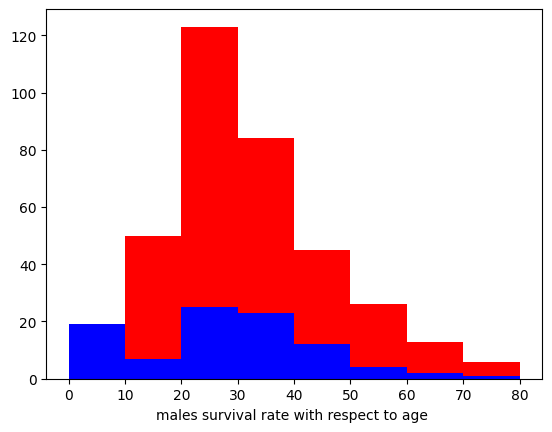

In [85]:

male_data_nsurv=full_data[(full_data["Sex"] == "male") &(y == 0)] 
male_data_surv=full_data[(full_data["Sex"] == "male") & (y == 1)]  
bins=np.arange(0,full_data['Age'].max()+10,10)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red")
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue")
plt.xlabel("males survival rate with respect to age ")

In [86]:
def predictions_2(data):
    predictions = []
    for i,passenger in data.iterrows():
        if (passenger['Sex']=='female') or (passenger['Sex']=='male'and passenger['Age']<10):
            
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)
predictions = predictions_2(x)


In [87]:
print(accuracy_score(y, predictions))

0.7934904601571269


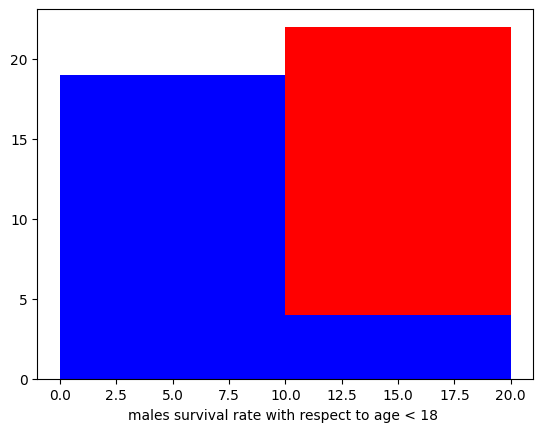

In [88]:
male_data_nsurv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 0) & (full_data["Age"] < 18)] # red
male_data_surv=full_data[(full_data["Sex"] == "male") & (full_data["Survived"] == 1) & (full_data["Age"] < 18)]  # blue
bins=np.arange(0,25,10)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="red")
plt.hist(data=male_data_surv,x='Age',bins=bins,color="blue")
plt.xlabel("males survival rate with respect to age < 18 ")

Text(0.5, 0, 'number of females passengers who survived and not survived with respect to the number of parch = 1')

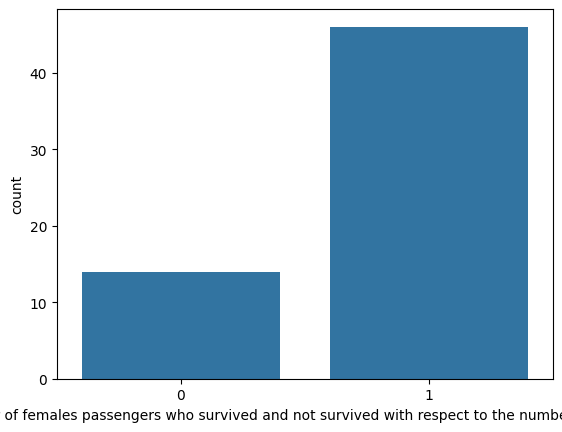

In [89]:
female_data_parch=full_data[(full_data["Sex"] == "female") & (full_data["Parch"] == 1 ) ]
sns.countplot(data=female_data_parch,x='Survived')
plt.xlabel("number of females passengers who survived and not survived with respect to the number of parch = 1")

Text(0.5, 0, 'number of females passengers who survived and not survived with respect to the number of parch =2')

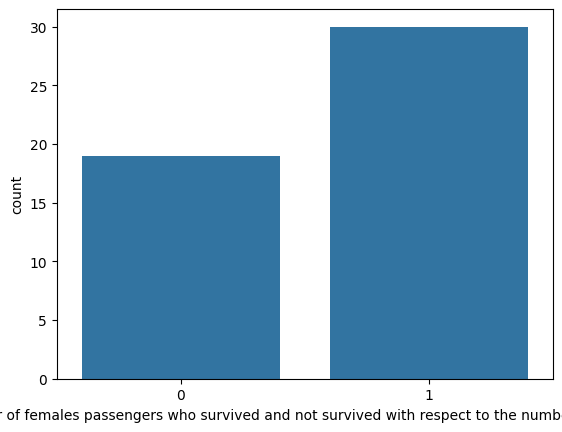

In [90]:
female_data_parch=full_data[(full_data["Sex"] == "female") & (full_data["Parch"] == 2 ) ]
sns.countplot(data=female_data_parch,x='Survived')
plt.xlabel("number of females passengers who survived and not survived with respect to the number of parch =2")

Text(0.5, 0, 'number of females who survived and not with respect to the number of parch =3')

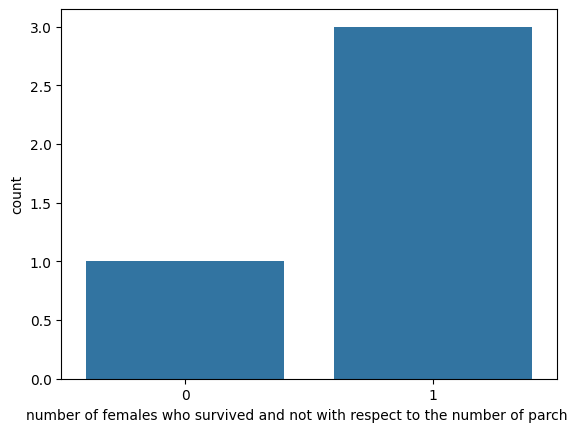

In [91]:
female_data_parch=full_data[(full_data["Sex"] == "female") & (full_data["Parch"] == 3 ) ]
sns.countplot(data=female_data_parch,x='Survived')
plt.xlabel("number of females who survived and not with respect to the number of parch =3")

Text(0.5, 0, 'number of females passengers who survived and not survived with respect to the number of parch =4')

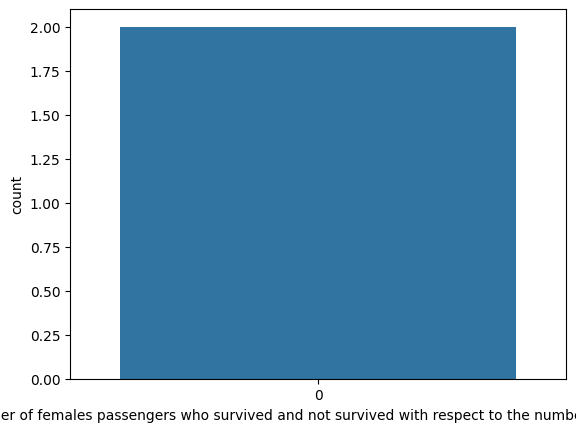

In [92]:
female_data_parch=full_data[(full_data["Sex"] == "female") & (full_data["Parch"] == 4 ) ]
sns.countplot(data=female_data_parch,x='Survived')
plt.xlabel("number of females passengers who survived and not survived with respect to the number of parch =4")

Text(0.5, 0, 'number of females passengers who survived and not survived with respect to the number of parch >= 4')

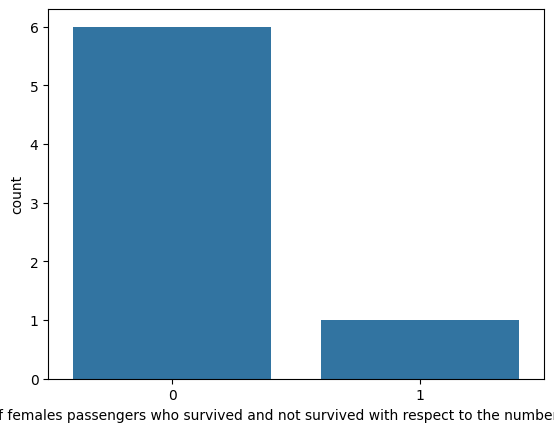

In [93]:
female_data_parch=full_data[(full_data["Sex"] == "female") & (full_data["Parch"] >= 4) ]
sns.countplot(data=female_data_parch,x='Survived')
plt.xlabel("number of females passengers who survived and not survived with respect to the number of parch >= 4")

Text(0.5, 0, 'number of females passengers who survived and not survived with respect to the number of parch <4')

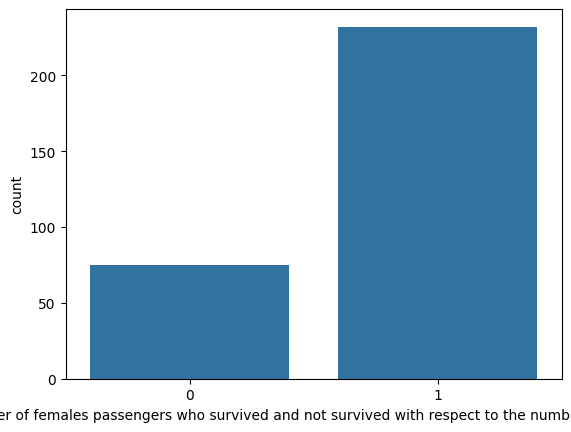

In [94]:
female_data_parch=full_data[(full_data["Sex"] == "female") & (full_data["Parch"] < 4 ) ]
sns.countplot(data=female_data_parch,x='Survived')
plt.xlabel("number of females passengers who survived and not survived with respect to the number of parch <4")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (1)')

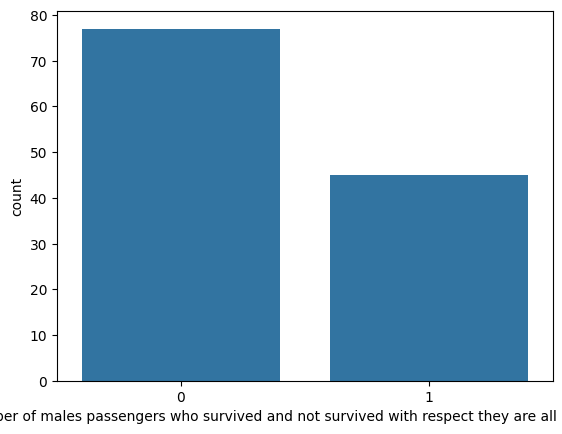

In [95]:
male_data_class=full_data[(full_data["Sex"] == "male") & (full_data["Pclass"] == 1)]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (1)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (2)')

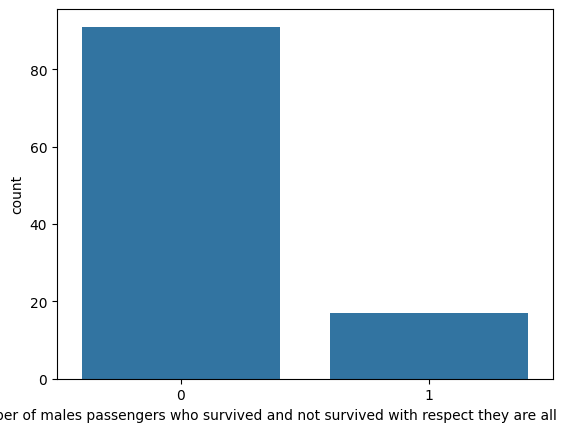

In [96]:
male_data_class=full_data[(full_data["Sex"] == "male") & (full_data["Pclass"] == 2)]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (2)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (3)')

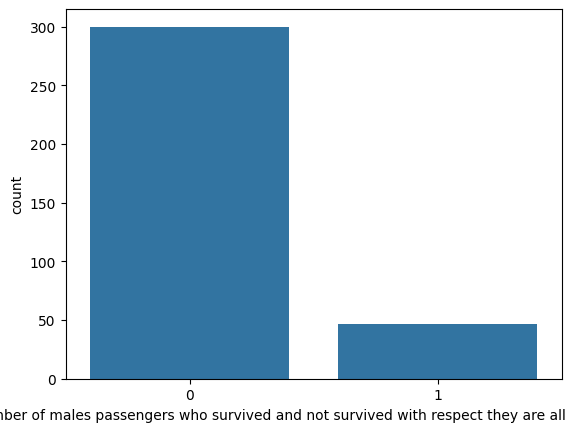

In [97]:
male_data_class=full_data[(full_data["Sex"] == "male") & (full_data["Pclass"] == 3)]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (3)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (3)')

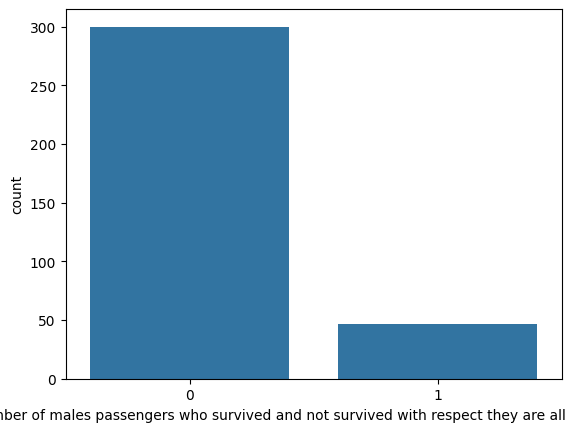

In [120]:
embarked_class=full_data[(full_data["Sex"] == "male") & (full_data["Embarked"] == 'Q')]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (3)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (3)')

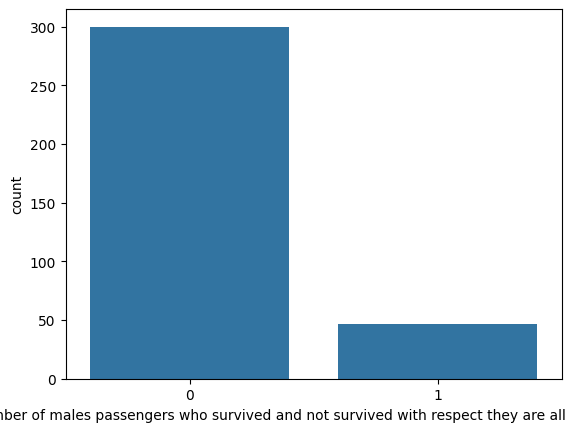

In [121]:
embarked_class=full_data[(full_data["Sex"] == "male") & (full_data["Embarked"] == 'S')]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (3)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (3)')

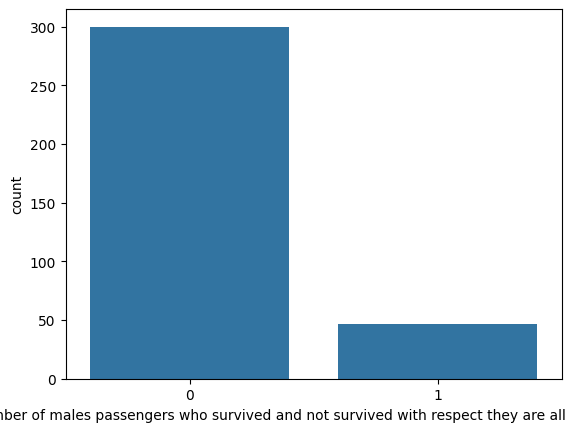

In [122]:
embarked_class=full_data[(full_data["Sex"] == "male") & (full_data["Embarked"] == 'C')]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (3)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (3)')

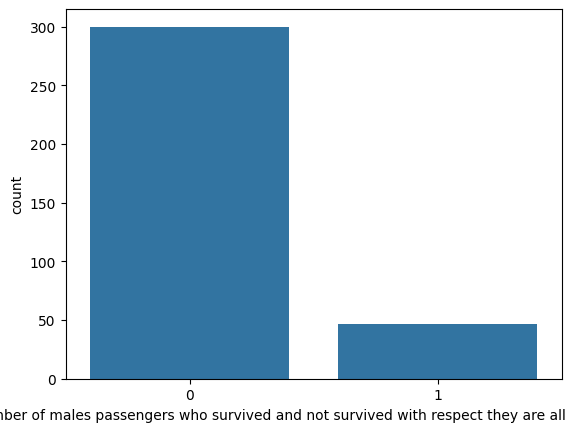

In [123]:
embarked_class=full_data[(full_data["Sex"] == "male") & (full_data["Embarked"] == '0')]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (3)")

Text(0.5, 0, 'number of males passengers who survived and not survived with respect they are all in Pclass (3)')

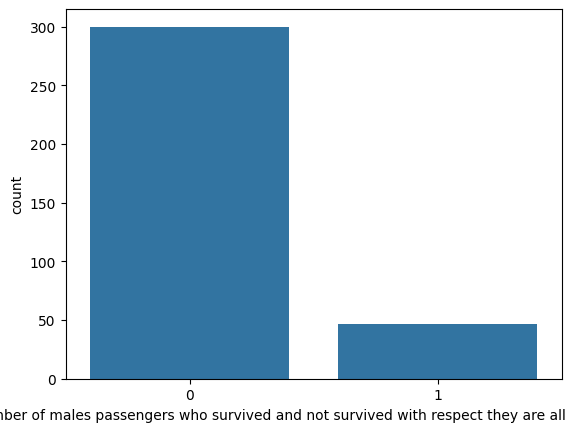

In [131]:
embarked_class=full_data[(full_data["Sex"] == "male") & (full_data["SibSp"] <= 3)]
sns.countplot(data=male_data_class,x='Survived')
plt.xlabel("number of males passengers who survived and not survived with respect they are all in Pclass (3)")

Text(0.5, 0, 'males survival rate with respect to age and class(1)')

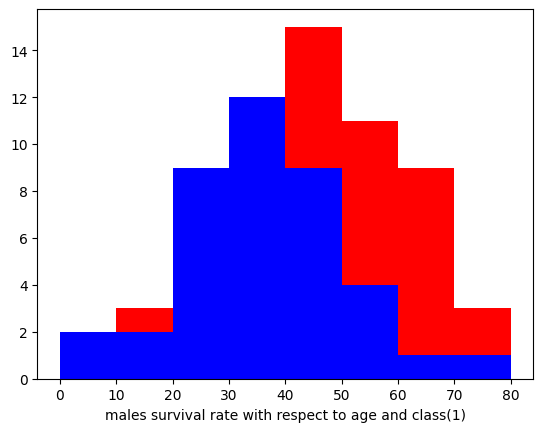

In [98]:
male_data_class_n=full_data[(full_data["Sex"] == "male") & (full_data["Pclass"] == 1) & (full_data["Survived"] == 0)] #red
male_data_class_s=full_data[(full_data["Sex"] == "male") & (full_data["Pclass"] == 1) & (full_data["Survived"] == 1)] #blue
bins=np.arange(0,full_data['Age'].max()+10,10)
plt.hist(data=male_data_class_n,x='Age',bins=bins,color="red")
plt.hist(data=male_data_class_s,x='Age',bins=bins,color="blue")
plt.xlabel("males survival rate with respect to age and class(1)")

In [99]:
def predictions_3(data):
    predictions = []
    for i, passenger in data.iterrows():
        if (passenger['Sex']=='female' and passenger['Parch']<4) or(passenger['Sex']=='male' and passenger['Age']<10) or(passenger['Sex']=='male'and (30<passenger['Age']<40)and passenger['Pclass']==1):
            predictions.append(1)
        else:
            predictions.append(0)
    
    return pd.Series(predictions)
predictions = predictions_3(x)

In [100]:
print(accuracy_score(y, predictions))

0.8013468013468014
